In [66]:
import pandas as pd
import matplotlib.pyplot as plt

<Figure size 1200x600 with 0 Axes>

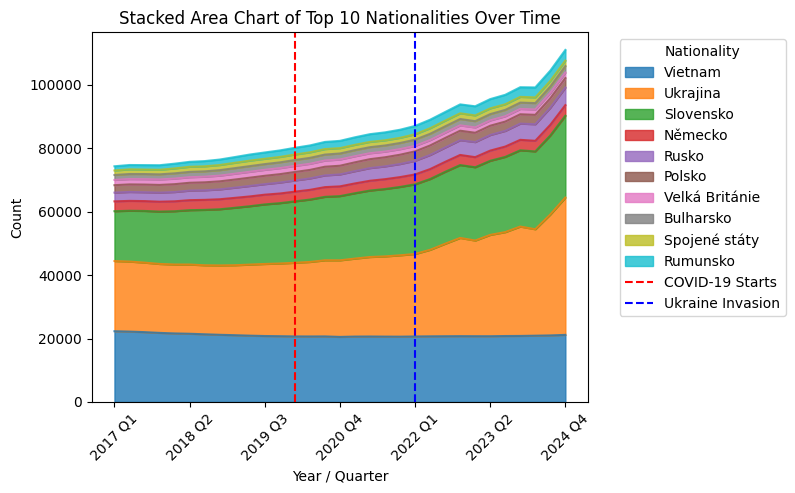

In [69]:

# Load the dataset (assuming it's a CSV)
df = pd.read_csv("Download_CSV/merged_sums.csv", sep=';', index_col=0)

# Select only the first 10 rows, except the first one (Czech Republic)
df_top10 = df[1:11]

# Transpose the DataFrame so columns become the X-axis
df_top10 = df_top10.T  

# Remove duplicates from the index if any
#df_top10 = df_top10.loc[~df_top10.index.duplicated(keep='first')]

# Plot stacked area chart
plt.figure(figsize=(12, 6))
ax = df_top10.plot(kind="area", stacked=True, colormap="tab10", alpha=0.8)

# Add vertical lines for key events (COVID-19 and Ukraine Invasion)
plt.axvline(x=df_top10.index.get_loc('2020 Q1'), color='red', linestyle='--', label="COVID-19 Starts")
plt.axvline(x=df_top10.index.get_loc('2022 Q1'), color='blue', linestyle='--', label="Ukraine Invasion")

# Labels & Title
plt.xlabel("Year / Quarter")
plt.ylabel("Count")
plt.title("Stacked Area Chart of Top 10 Nationalities Over Time")
plt.legend(title="Nationality", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)

# Show plot
plt.show()


In [ ]:
df_top10

<Figure size 1200x600 with 0 Axes>

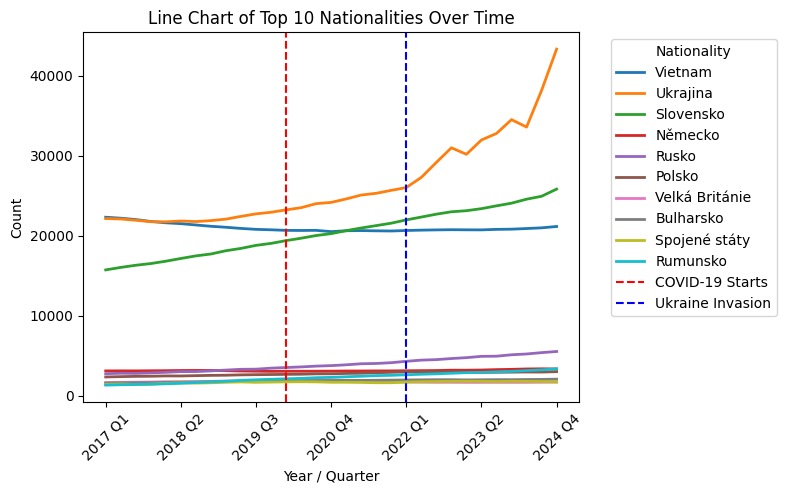

In [71]:
# Plot line chart
plt.figure(figsize=(12, 6))
df_top10.plot(kind="line", colormap="tab10", linewidth=2)

# Add vertical lines for key events (COVID-19 and Ukraine Invasion)
plt.axvline(x=df_top10.index.get_loc('2020 Q1'), color='red', linestyle='--', label="COVID-19 Starts")
plt.axvline(x=df_top10.index.get_loc('2022 Q1'), color='blue', linestyle='--', label="Ukraine Invasion")

# Labels & Title
plt.xlabel("Year / Quarter")
plt.ylabel("Count")
plt.title("Line Chart of Top 10 Nationalities Over Time")
plt.legend(title="Nationality", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)

# Show plot
plt.show()

<Figure size 1200x600 with 0 Axes>

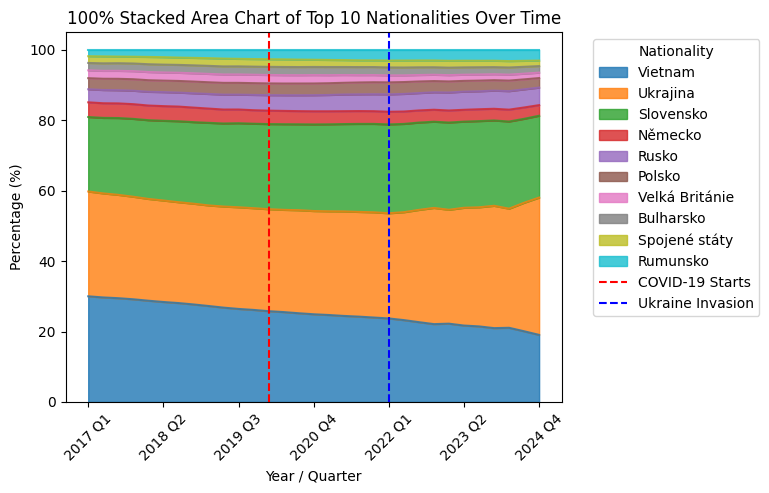

In [72]:
# Normalize each column to sum up to 100% (percentage of total for each time period)
df_top10_percentage = df_top10.div(df_top10.sum(axis=1), axis=0) * 100

# Plot 100% stacked area chart
plt.figure(figsize=(12, 6))
df_top10_percentage.plot(kind="area", stacked=True, colormap="tab10", alpha=0.8)

# Add vertical lines for key events (COVID-19 and Ukraine Invasion)
plt.axvline(x=df_top10.index.get_loc('2020 Q1'), color='red', linestyle='--', label="COVID-19 Starts")
plt.axvline(x=df_top10.index.get_loc('2022 Q1'), color='blue', linestyle='--', label="Ukraine Invasion")


# Labels & Title
plt.xlabel("Year / Quarter")
plt.ylabel("Percentage (%)")
plt.title("100% Stacked Area Chart of Top 10 Nationalities Over Time")
plt.legend(title="Nationality", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)

# Show plot
plt.show()